In [1]:
# Dependencies and Setup
import json
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key
from api_keys import g_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy


# Output File (CSV)
output_data_file = "../output_data_cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))

606


In [3]:
#  Perform API Calls

# Perform a weather check on each city using a series of successive API calls.
# Include a print log of each city as it's being processed (with the city number and city name).

In [4]:
# Base URL to work off     
base_url = "http://api.openweathermap.org/data/2.5/weather?"

# Counter to go through data
record = 0
sets = 1

# Create DataFrame
weather_df = pd.DataFrame({"City": cities})

weather_df["Country"] = ""
weather_df["Date"] = ""      
weather_df["Latitude"] = ""
weather_df["Longitude"] = ""
weather_df["Cloudiness (%)"] = ""
weather_df["Humidity (%)"] = ""
weather_df["Max Temp (F)"] = ""
weather_df["Wind Speed (mph)"] = ""


# Interate through Cities and retrieve data
print("Beginning Data Retrieval")
print("-----------------------------")


for index, row in weather_df.iterrows():
    
    city = row["City"]
    
    query_url = base_url + "appid=" + weather_api_key + "&q=" + city
    weather_response = requests.get(query_url).json()
 
    try:
        print(f"Processing Record {record}  of Set {sets} | {city}.")
        #print (query_url) 
        
        weather_df.loc[index, "Country"] = weather_response["sys"]["country"]     
        weather_df.loc[index, "Date"] = datetime.datetime.fromtimestamp(weather_response["dt"])
        weather_df.loc[index, "Latitude"] = weather_response["coord"]["lat"]
        weather_df.loc[index, "Longitude"] = weather_response["coord"]["lon"]
        weather_df.loc[index, "Cloudiness (%)"] = weather_response["clouds"]["all"]
        weather_df.loc[index, "Humidity (%)"] = weather_response["main"]["humidity"]
        weather_df.loc[index, "Max Temp (F)"] = 1.8 * (weather_response["main"]["temp_max"] - 273) + 32
        weather_df.loc[index, "Wind Speed (mph)"] = weather_response["wind"]["speed"]
               
    except:
        print(f"City not found...skipping {city}.")
        #print (query_url) 
        
    
    record = record + 1
    if record == 50:
        record = 0
        sets = sets + 1 

print("-----------------------------")        
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 0  of Set 1 | victoria.
Processing Record 1  of Set 1 | mogadishu.
Processing Record 2  of Set 1 | tuktoyaktuk.
Processing Record 3  of Set 1 | lichtenburg.
Processing Record 4  of Set 1 | berlevag.
Processing Record 5  of Set 1 | abonnema.
Processing Record 6  of Set 1 | ushuaia.
Processing Record 7  of Set 1 | hervey bay.
Processing Record 8  of Set 1 | gurgan.
City not found...skipping gurgan.
Processing Record 9  of Set 1 | comodoro rivadavia.
Processing Record 10  of Set 1 | bluff.
Processing Record 11  of Set 1 | cap-chat.
Processing Record 12  of Set 1 | dingle.
Processing Record 13  of Set 1 | new norfolk.
Processing Record 14  of Set 1 | kapaa.
Processing Record 15  of Set 1 | busselton.
Processing Record 16  of Set 1 | rikitea.
Processing Record 17  of Set 1 | port hedland.
Processing Record 18  of Set 1 | paraiso.
Processing Record 19  of Set 1 | bambous virieux.
Processing Record 20  of Set 1 | saskyla

Processing Record 24  of Set 4 | ahipara.
Processing Record 25  of Set 4 | talnakh.
Processing Record 26  of Set 4 | aasiaat.
Processing Record 27  of Set 4 | lata.
Processing Record 28  of Set 4 | belyy yar.
Processing Record 29  of Set 4 | bansdih.
Processing Record 30  of Set 4 | kanye.
Processing Record 31  of Set 4 | makakilo city.
Processing Record 32  of Set 4 | castro.
Processing Record 33  of Set 4 | zhezkazgan.
Processing Record 34  of Set 4 | muravlenko.
Processing Record 35  of Set 4 | kavaratti.
Processing Record 36  of Set 4 | mar del plata.
Processing Record 37  of Set 4 | egvekinot.
Processing Record 38  of Set 4 | nikolskoye.
Processing Record 39  of Set 4 | vardo.
Processing Record 40  of Set 4 | olafsvik.
Processing Record 41  of Set 4 | rameshki.
Processing Record 42  of Set 4 | upernavik.
Processing Record 43  of Set 4 | roseburg.
Processing Record 44  of Set 4 | katsuura.
Processing Record 45  of Set 4 | juba.
Processing Record 46  of Set 4 | te anau.
Processing R

Processing Record 6  of Set 8 | kilindoni.
Processing Record 7  of Set 8 | kastamonu.
Processing Record 8  of Set 8 | iberia.
Processing Record 9  of Set 8 | hailar.
Processing Record 10  of Set 8 | chernyshevskiy.
Processing Record 11  of Set 8 | zlocieniec.
Processing Record 12  of Set 8 | xai-xai.
Processing Record 13  of Set 8 | linapacan.
City not found...skipping linapacan.
Processing Record 14  of Set 8 | khatanga.
Processing Record 15  of Set 8 | kutum.
Processing Record 16  of Set 8 | puerto maldonado.
Processing Record 17  of Set 8 | richards bay.
Processing Record 18  of Set 8 | alghero.
Processing Record 19  of Set 8 | nguruka.
Processing Record 20  of Set 8 | bend.
Processing Record 21  of Set 8 | norman wells.
Processing Record 22  of Set 8 | tacna.
Processing Record 23  of Set 8 | mackenzie.
Processing Record 24  of Set 8 | pochutla.
Processing Record 25  of Set 8 | northam.
Processing Record 26  of Set 8 | strezhevoy.
Processing Record 27  of Set 8 | yacuiba.
Processing

Processing Record 32  of Set 11 | zhangjiakou.
Processing Record 33  of Set 11 | lorengau.
Processing Record 34  of Set 11 | kaberamaido.
Processing Record 35  of Set 11 | nanyuki.
Processing Record 36  of Set 11 | lavrentiya.
Processing Record 37  of Set 11 | kautokeino.
Processing Record 38  of Set 11 | lubango.
Processing Record 39  of Set 11 | gurskoye.
City not found...skipping gurskoye.
Processing Record 40  of Set 11 | ghatanji.
Processing Record 41  of Set 11 | goure.
Processing Record 42  of Set 11 | mwene-ditu.
Processing Record 43  of Set 11 | isla mujeres.
Processing Record 44  of Set 11 | saint-joseph.
Processing Record 45  of Set 11 | namibe.
Processing Record 46  of Set 11 | venancio aires.
Processing Record 47  of Set 11 | bilma.
Processing Record 48  of Set 11 | parabel.
Processing Record 49  of Set 11 | abengourou.
Processing Record 0  of Set 12 | souillac.
Processing Record 1  of Set 12 | launceston.
Processing Record 2  of Set 12 | pospelikha.
Processing Record 3  o

In [5]:
#  Convert Raw Data to DataFrame
# Data Count
weather_df.count()

City                606
Country             606
Date                606
Latitude            606
Longitude           606
Cloudiness (%)      606
Humidity (%)        606
Max Temp (F)        606
Wind Speed (mph)    606
dtype: int64

In [6]:
# Display DataFrame
weather_df.head()

,City,Country,Date,Latitude,Longitude,Cloudiness (%),Humidity (%),Max Temp (F),Wind Speed (mph)
0,victoria,HK,2020-11-01 17:48:22,22.29,114.16,100,63,78.278,0.89
1,mogadishu,SO,2020-11-01 17:47:08,2.04,45.34,61,80,79.016,3.31
2,tuktoyaktuk,CA,2020-11-01 17:50:03,69.45,-133.04,90,85,14.27,5.7
3,lichtenburg,ZA,2020-11-01 17:54:08,-26.15,26.16,22,88,57.74,4.07
4,berlevag,NO,2020-11-01 17:50:41,70.86,29.09,100,84,43.682,15.22


In [7]:
# Convert data strings to float
pd.to_numeric(weather_df["Cloudiness (%)"]).astype(float)
pd.to_numeric(weather_df["Humidity (%)"]).astype(float)
pd.to_numeric(weather_df["Latitude"]).astype(float)
pd.to_numeric(weather_df["Longitude"]).astype(float)
pd.to_numeric(weather_df["Max Temp (F)"]).astype(float)
pd.to_numeric(weather_df["Wind Speed (mph)"]).astype(float)
weather_df

#Export DataFrame to CSV File
weather_df.to_csv("weather_df.csv")

The plot proves that as temperature drops as you move away from the equator


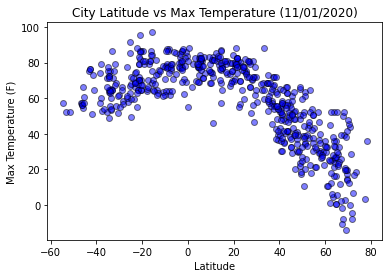

In [8]:
#  Plotting the Data

# Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
# Save the plotted figures as .pngs.

today = time.strftime("%m/%d/%Y")
plt.scatter(pd.to_numeric(weather_df["Latitude"]).astype(float), pd.to_numeric(weather_df["Max Temp (F)"]).astype(float), facecolors="blue", edgecolors="black", alpha = 0.5)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title(f"City Latitude vs Max Temperature ({today})")
print("The plot proves that as temperature drops as you move away from the equator")
plt.savefig("Latitude_Max_Temp.png")

The plot shows that there is no real pattern describing the relationship between latitude and humidity


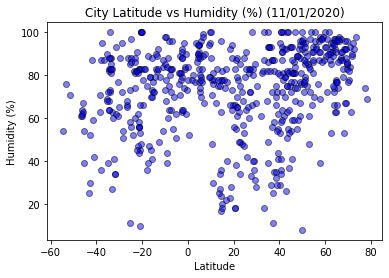

In [9]:
#  Latitude vs. Humidity Plot
plt.scatter(pd.to_numeric(weather_df["Latitude"]).astype(float), pd.to_numeric(weather_df["Humidity (%)"]).astype(float), facecolors="blue", edgecolors="black", alpha = 0.5)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs Humidity (%) ({today})")
print("The plot shows that there is no real pattern describing the relationship between latitude and humidity")
plt.savefig("Latitude_Humidity.png")

The plot shows that the relationship between Cloudiness and Latitude is all over the place and no real pattern can be discerned


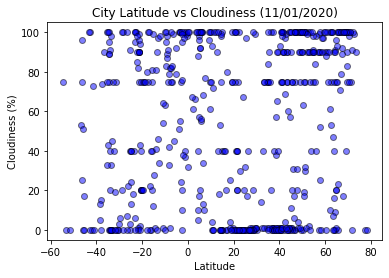

In [10]:
#  Latitude vs. Cloudiness Plot

today = time.strftime("%m/%d/%Y")
plt.scatter(pd.to_numeric(weather_df["Latitude"]).astype(float), pd.to_numeric(weather_df["Cloudiness (%)"]).astype(float), facecolors="blue", edgecolors="black", alpha = 0.5)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"City Latitude vs Cloudiness ({today})")
print("The plot shows that the relationship between Cloudiness and Latitude is all over the place and no real pattern can be discerned")
plt.savefig("Latitude_Cloudiness.png")

The plot shows that the relationship between Wind Speed and Latitude is all over the place and no real pattern can be discerned


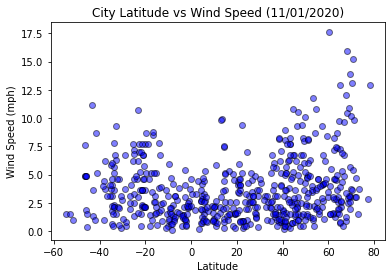

In [11]:
# Latitude vs. Wind Speed Plot


today = time.strftime("%m/%d/%Y")
plt.scatter(pd.to_numeric(weather_df["Latitude"]).astype(float), pd.to_numeric(weather_df["Wind Speed (mph)"]).astype(float), facecolors="blue", edgecolors="black", alpha = 0.5)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title(f"City Latitude vs Wind Speed ({today})")
print("The plot shows that the relationship between Wind Speed and Latitude is all over the place and no real pattern can be discerned")
plt.savefig("Latitude_Wind_Speed.png")

In [12]:
#  Linear Regression

In [13]:
northern_df = weather_df.loc[pd.to_numeric(weather_df["Latitude"]).astype(float) > 0, :]
southern_df = weather_df.loc[pd.to_numeric(weather_df["Latitude"]).astype(float) < 0, :]

Regression line equation is: y = -0.99x + 90.76
The r-value is: -0.8534685600250008
The regression displays a negative correlation.
In the nothern hemisphere, as you move away from the equator the temperature decreases.


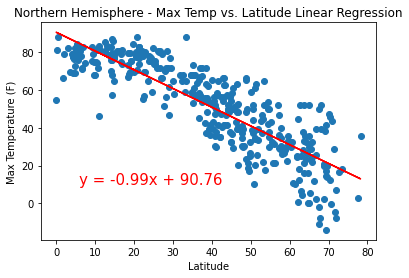

<Figure size 432x288 with 0 Axes>

In [14]:
#  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

x_values = pd.to_numeric(northern_df['Latitude']).astype(float)
y_values = pd.to_numeric(northern_df['Max Temp (F)']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
print(f"The r-value is: {rvalue}")
print("The regression displays a negative correlation.")
print("In the nothern hemisphere, as you move away from the equator the temperature decreases.")
plt.show()
plt.savefig("Latitude_Max_Temp_Linear_North.png")

In [15]:
print(f"The r-value is: {rvalue}")

The r-value is: -0.8534685600250008


Regression line equation is: y = 0.42x + 79.98
The r-value is: 0.5304701611550158
The regression displays a positive correlation.
In the southern hemisphere, as you get closer to the equator the temperature increases.


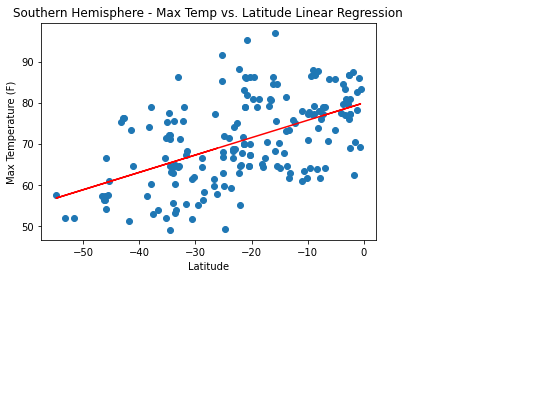

<Figure size 432x288 with 0 Axes>

In [16]:
#  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

x_values = pd.to_numeric(southern_df['Latitude']).astype(float)
y_values = pd.to_numeric(southern_df['Max Temp (F)']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')
print(f"The r-value is: {rvalue}")
print("The regression displays a positive correlation.")
print("In the southern hemisphere, as you get closer to the equator the temperature increases.")
plt.show()
plt.savefig("Latitude_Max_Temp_Linear_South.png")

In [17]:
print(f"The r-value is: {rvalue}")

The r-value is: 0.5304701611550158


Regression line equation is: y = 0.25x + 64.89
The r-value is: 0.24671789574874922
The regression does not display much of a correlation between the data sets.


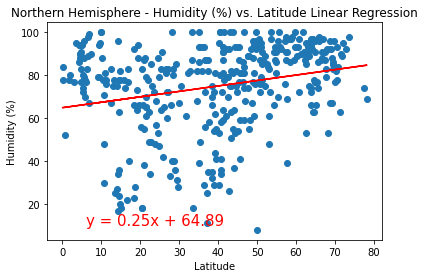

<Figure size 432x288 with 0 Axes>

In [18]:
#  Northern Hemisphere - Humidity vs. Latitude Linear Regression

x_values = pd.to_numeric(northern_df['Latitude']).astype(float)
y_values = pd.to_numeric(northern_df['Humidity (%)']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
print(f"The r-value is: {rvalue}")
print("The regression does not display much of a correlation between the data sets.") 
plt.show()
plt.savefig("Latitude_Humidity_North.png")

In [19]:
print(f"The r-value is: {rvalue}")

The r-value is: 0.24671789574874922


Regression line equation is: y = 0.33x + 78.18
The r-value is: 0.2394298264966788
The regression does not display much of a correlation between the data sets.


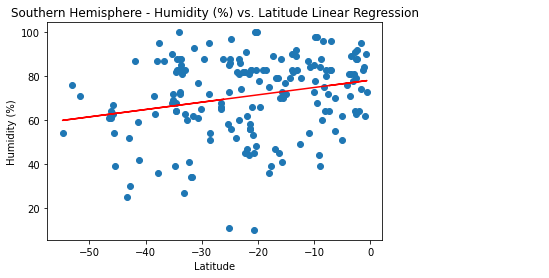

<Figure size 432x288 with 0 Axes>

In [20]:
# Southern Hemisphere - Humidity vs. Latitude Linear Regression

x_values = pd.to_numeric(southern_df['Latitude']).astype(float)
y_values = pd.to_numeric(southern_df['Humidity (%)']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
print(f"The r-value is: {rvalue}")
print("The regression does not display much of a correlation between the data sets.")
plt.show()
plt.savefig("Latitude_Humidity_South.png")

In [21]:
print(f"The r-value is: {rvalue}")

The r-value is: 0.2394298264966788


Regression line equation is: y = 0.41x + 37.1
The r-value is: 0.19451327834152937
The regression does not display much of a correlation between the data sets.


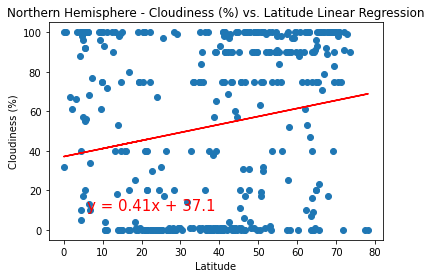

<Figure size 432x288 with 0 Axes>

In [22]:
# Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

x_values = pd.to_numeric(northern_df['Latitude']).astype(float)
y_values = pd.to_numeric(northern_df['Cloudiness (%)']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
print(f"The r-value is: {rvalue}")
print("The regression does not display much of a correlation between the data sets.")
plt.show()
plt.savefig("Latitude_Cloudiness_North.png")

In [23]:
print(f"The r-value is: {rvalue}")

The r-value is: 0.19451327834152937


Regression line equation is: y = 0.82x + 70.47
The r-value is: 0.27968246117255535
The regression does not display much of a correlation between the data sets.


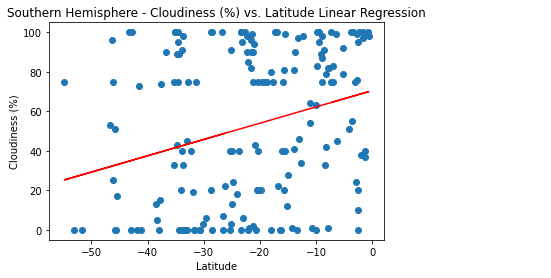

<Figure size 432x288 with 0 Axes>

In [24]:
# Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

x_values = pd.to_numeric(southern_df['Latitude']).astype(float)
y_values = pd.to_numeric(southern_df['Cloudiness (%)']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
print(f"The r-value is: {rvalue}")
print("The regression does not display much of a correlation between the data sets.")
plt.show()
plt.savefig("Latitude_Cloudiness_South.png")

In [25]:
print(f"The r-value is: {rvalue}")

The r-value is: 0.27968246117255535


Regression line equation is: y = 0.05x + 1.92
The r-value is: 0.31707062767064825
The regression does not display much of a correlation between the data sets.


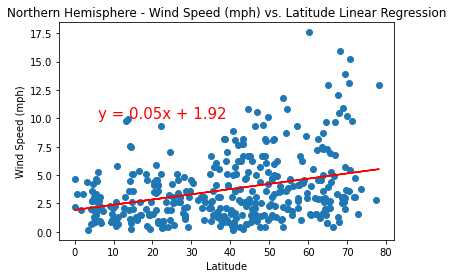

<Figure size 432x288 with 0 Axes>

In [26]:
# Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
x_values = pd.to_numeric(northern_df['Latitude']).astype(float)
y_values = pd.to_numeric(northern_df['Wind Speed (mph)']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
print(f"The r-value is: {rvalue}")
print("The regression does not display much of a correlation between the data sets.")
plt.show()
plt.savefig("Latitude_Wind_North.png")

In [27]:
print(f"The r-value is: {rvalue}")

The r-value is: 0.31707062767064825


Regression line equation is: y = -0.04x + 2.46
The r-value is: -0.23633366626632885
The regression does not display much of a correlation between the data sets.


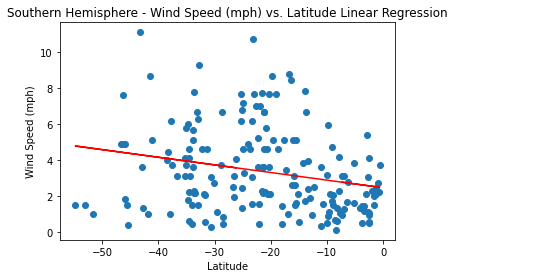

<Figure size 432x288 with 0 Axes>

In [28]:
#  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

x_values = pd.to_numeric(southern_df['Latitude']).astype(float)
y_values = pd.to_numeric(southern_df['Wind Speed (mph)']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
print(f"The r-value is: {rvalue}")
print("The regression does not display much of a correlation between the data sets.")
plt.show()
plt.savefig("Latitude_Wind_South.png")

In [29]:
print(f"The r-value is: {rvalue}")

The r-value is: -0.23633366626632885
